# Uso de módulos en Python

*Cardona, Paula; Ospina, Paola; Rojas, Jorge*

En este cuaderno de Jupyter, se abordará la correcta importación y uso de funciones definidas en archivos externos de Python, una práctica fundamental para la estructuración eficiente del código en proyectos de análisis de datos, modelado y automatización de procesos. La modularización del código mediante la creación de archivos independientes permite mejorar la organización, reutilización y mantenibilidad de las funciones, evitando la duplicación innecesaria y facilitando la escalabilidad del proyecto.

Es así como funciona la arquitectura de software, la cual determina cómo un sistema se estructura, interactúa y evoluciona, pues no solo se trata de escribir código funcional, sino de crear un proyecto que garantice. (Grady Booch et al., 2005)

* Mantenibilidad: Facilidad para corregir errores o añadir características.

* Escalabilidad: Capacidad de crecer sin colapsar.

* Reutilización: Evitar reinventar la rueda en cada proyecto.

* Legibilidad: Código claro para equipos presentes y futuros.

La arquitectura de software ha dado origen a patrones robustos y ampliamente adoptados, entre ellos, destaca el patrón Modelo-Vista-Controlador (MVC), un modelo de arquitectura de software que organiza la aplicación en tres capas distintas pero interdependientes. 

* El Modelo, se encarga de la gestión de datos y la implementación de las reglas del dominio, asegurando la integridad y consistencia de la información. 

* La Vista, actúa como la interfaz con el usuario, presentando la información, adaptándose a las necesidades de la experiencia del usuario. 

* El Controlador organiza la interacción entre el Modelo y la Vista, recibiendo las peticiones del usuario y coordinando las acciones necesarias para satisfacerlas.

(Fowler, M., 2002)

Otro modelo de arquitectura es el de Microservicios, el cual es una solución moderna para aplicaciones complejas, descomponiendo el sistema en una colección de servicios autónomos e independientes. Cada microservicio encapsula una funcionalidad específica y se comunica con los demás a través de APIs REST o sistemas de mensajería, permitiendo una mayor flexibilidad, escalabilidad y resiliencia. Según Newman, S. (2015)  esta arquitectura fomenta la especialización de los equipos de desarrollo y facilita la adopción de nuevas tecnologías en cada servicio, impulsando la innovación y la adaptabilidad en el panorama digital actual.

Es así como el enfoque modular no solo mejora la claridad del código, sino que también optimiza el flujo de trabajo al permitir la separación de funcionalidades en diferentes archivos, facilitando la colaboración en entornos de desarrollo y la depuración del código.

# ¿Qué es un módulo?

Un módulo es un bloque autocontenido de código que resuelve una tarea específica. En Python, un archivo .py es un módulo, es así como en nuestros poryectos podemos tener, multiplicidad de archivos tipo .py. A continuación, podemos ver un ejemplo de directorios de la estructura modular:

proyecto/  
├── datos/              # Manejo de bases de datos  
│   ├── conexion.py  
│   └── consultas.py  
├── logica/             # Reglas de negocio  
│   └── pedidos.py  
├── interfaz/           # Interacción con el usuario  
│   └── cli.py  
└── utilidades/         # Funciones auxiliares  
    └── validaciones.py  

Esto permite que en un proyecto de software se realice desarrollo paralelo, lo cual involucra que diferentes equipos trabajen en módulos sin dañar la estructura principal del software; así mismo, permite aislar errores mediante la implementación de pruebas unitarias además de que el hecho de cambiar un módulo no daña el sistema.

# Llamado de funciones entre archivos en Python

Para el presente Jupyter Notebook crearemos un conjunto de funciones en un archivo independiente, las cuales calcularán varios índices espectrales utilizados en teledetección. En particular, implementaremos funciones para calcular los siguientes índices:

- *NDVI (Índice de Vegetación de Diferencia Normalizada)*: Se usa ampliamente para evaluar la salud de la vegetación a partir de bandas del infrarrojo cercano (NIR) y el rojo (Red) (Rouse et al., 1974).
- *GNDVI (Índice de Vegetación de Diferencia Normalizada Verde)*: Similar al NDVI, pero utiliza la banda del verde en lugar de la roja, permitiendo detectar variaciones en el contenido de clorofila de la vegetación (Gitelson et al., 1996).
- *NDSI (Índice de Diferencia Normalizada de la Nieve)*: Se utiliza para detectar nieve en imágenes satelitales comparando las bandas del verde (Green) y del infrarrojo de onda corta (SWIR) (Hall et al., 1995).
- *SAVI (Índice de Vegetación Ajustado al Suelo)*: Variante del NDVI que incorpora un factor de corrección para minimizar la influencia del suelo desnudo, especialmente en áreas con poca vegetación (Huete, 1988).
- *EVI (Índice de Vegetación Mejorado)*: Similar al NDVI, pero con mejoras en la corrección de efectos atmosféricos y saturación en áreas de alta biomasa (Huete et al., 2002).
- *NBR (Índice de Quema Normalizada)*: Diseñado para detectar áreas afectadas por incendios forestales usando las bandas del NIR e infrarrojo de onda corta (Key & Benson, 2006).
- *GLI (Índice de Verdor Global)*: Mide el verdor de la vegetación utilizando las bandas del rojo, verde y azul (RGB), útil en monitoreo agrícola (Louhaichi et al., 2001).
- *GCL (Índice de Clorofila Verde)*: Se emplea para estimar la cantidad de clorofila en la vegetación utilizando la banda verde e infrarroja cercana (Gitelson et al., 2002).
- *RGR (Índice de Relación Verde-Rojo)*: Evalúa la proporción de la reflectancia en el espectro verde y rojo, útil para la detección de estrés en cultivos (Carter & Knapp, 2001).
- *SIPI (Índice de Pigmentación Estructural de la Vegetación)*: Se usa para evaluar la proporción de carotenoides a clorofila en las hojas, un indicador de estrés vegetal (Peñuelas et al., 1995).

El objetivo de este ejercicio es demostrar cómo estructurar un proyecto en Python separando la lógica de cálculo en módulos reutilizables y llamando funciones entre archivos. Esto facilitará la organización y reutilización del código en proyectos de *Programación SIG*.

El esquema de nuestro proyecto se ve así:

proyecto/

├── Utilities/              # Funciones de cálculo de índices espectrales y ploteo

│   ├── _ _init_ _.py  

│   ├── indices.py

│   └── plotear.py

├── geoprocess.py             # Realizaremos la implementación de las funciones haciendo las veces del archivo main.py  

├── Data/                   # Se encuentran los datos que usaremos para el proyecto  

│   └── Sentinel2.tif

El anterior bloque de código será guardado en el directorio Utilities en el archivo indices.py. Como se observa en el esquema de nuestro proyecto, existe un archivo llamado _ _init_ _.py. Este archivo le indica al intérprete de Python que la carpeta que lo contiene debe ser tratada como un módulo; esto no siempre es necesario, se requiere solo si el archivo a usar como módulo se encuentra en un directorio diferente o anidado al del proyecto.

A continuación haremos uso de una imagen Sentinel 2 de enero 2024 recortada para el municipio de Tunja, Boyacá y alrededores.

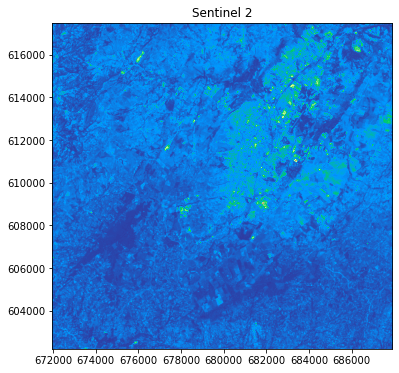

In [3]:
import rasterio 
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

sentinel = rasterio.open(r'Data\Sentinel2.tif')

plt.figure(figsize=(8, 6))
plt.title("Sentinel 2")
show(sentinel, cmap='terrain')
plt.show()

El archivo indices.py contiene las funciones que realiza el cálculo de los índices y su organización en un diccionario. Así mismo el archivo plotear.py contiene la función que visualiza en un mapa los resultados.

Ahora llamaremos nuestro archivo con las funciones de índices, ubicado en el directorio Utilities.

In [4]:
from Utilities import indices as ind

Ahora cargaremos las bandas y calcularemos los índices

In [5]:
# Cargamos cada banda como un array de numpy

blue = sentinel.read(1)
green = sentinel.read(2)
red = sentinel.read(3)
nir = sentinel.read(4)
swir = sentinel.read(5)  

# Calculamos los índices

ndvi_index = ind.ndvi(nir, red)
gndvi_index = ind.gndvi(nir, green)
ndsi_index = ind.ndsi(green, swir)
savi_index = ind.savi(nir, red)
evi_index = ind.evi(nir, red, blue)
nbr_index = ind.nbr(nir, swir)
gli_index = ind.gli(green, red, blue)
gcl_index = ind.gcl(green, red)
rgr_index = ind.rgr(red, green)
sipi_index = ind.sipi(nir, red, blue)

indices = ind.indices_dict(ndvi_index, gndvi_index, ndsi_index, savi_index, evi_index, nbr_index, gli_index, gcl_index, rgr_index, sipi_index)
indices


{'NDVI': array([[0.58378378, 0.64876633, 0.6743215 , ..., 0.51080247, 0.52047714,
         0.56388676],
        [0.58152686, 0.70807453, 0.7130846 , ..., 0.5146743 , 0.5107362 ,
         0.55135952],
        [0.70005084, 0.80490463, 0.70909091, ..., 0.50887383, 0.53603442,
         0.52880355],
        ...,
        [0.790314  , 0.71160854, 0.74453618, ..., 0.80399443, 0.78077922,
         0.72258388],
        [0.68366821, 0.71769384, 0.78573156, ..., 0.81868898, 0.81547619,
         0.77244359],
        [0.6787967 , 0.71618415, 0.74661057, ..., 0.84013605, 0.83470359,
         0.79426386]]),
 'GNDVI': array([[0.46622185, 0.52825112, 0.54901014, ..., 0.38570418, 0.41159099,
         0.43087154],
        [0.48233216, 0.60194175, 0.61386139, ..., 0.38845144, 0.39321075,
         0.43235704],
        [0.60306807, 0.69498465, 0.59322034, ..., 0.36725146, 0.4       ,
         0.41975309],
        ...,
        [0.65551181, 0.58267148, 0.6129322 , ..., 0.69458988, 0.68866995,
         0.650671

Ahora importaremos la función de visualización de índices

In [6]:
from Utilities import plotear as pl

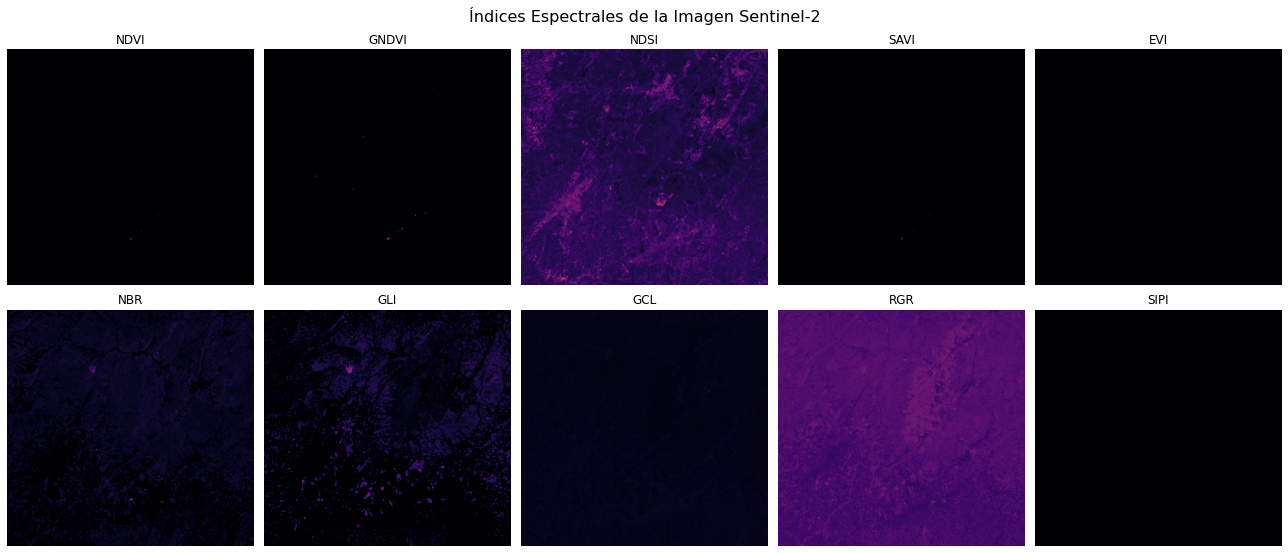

In [9]:
#Plot indices

pl.plot_raster(indices, 'inferno')

Se llamaron los módulos indices.py y plotear.py para ejemplificar el uso de módulos al interior de un proyecto con Python.

# Referencias:

* Booch, G., Rumbaugh, J., & Jacobson, I. (2005). The unified modeling language user guide (2nd ed.). Addison-Wesley.

* Carter, G. A., & Knapp, A. K. (2001). Leaf optical properties in higher plants: linking spectral characteristics to stress and chlorophyll concentration. American Journal of Botany, 88(4), 677-684. https://doi.org/10.2307/2657098

* Fowler, M. (2002). Patterns of enterprise application architecture. Addison-Wesley.
Gitelson, A. A., Kaufman, Y. J., & Merzlyak, M. N. (1996). Use of a green channel in remote sensing of global vegetation from EOS-MODIS. Remote Sensing of Environment, 58(3), 289-298. https://doi.org/10.1016/S0034-4257(96)00072-7

* Gitelson, A. A., Zur, Y., Chivkunova, O. B., & Merzlyak, M. N. (2002). Assessing carotenoid content in plant leaves with reflected visible radiation. Photochemistry and Photobiology, 75(3), 272-281. https://doi.org/10.1562/0031-8655(2002)075<0272:ACIPLL>2.0.CO;2

* Hall, D. K., Riggs, G. A., Salomonson, V. V., DiGirolamo, N. E., & Bayr, K. J. (1995). Development of methods for mapping global snow cover using moderate resolution imaging spectroradiometer data. Remote Sensing of Environment, 54(2), 127-140. https://doi.org/10.1016/0034-4257(95)00137-P

* Huete, A. R. (1988). A soil-adjusted vegetation index (SAVI). Remote Sensing of Environment, 25(3), 295-309. https://doi.org/10.1016/0034-4257(88)90106-X

* Huete, A. R., Justice, C. O., & Liu, H. (1999). Development of vegetation and soil indices for MODIS-EOS. Remote Sensing of Environment, 70(1), 108-122. https://doi.org/10.1016/S0034-4257(99)00037-6

* Key, C. H., & Benson, N. C. (2006). Landscape assessment: remote sensing of severity, the Normalized Burn Ratio. General Technical Report RMRS-GTR-164-CD. USDA Forest Service.

* Louhaichi, M., Borman, M. M., & Johnson, D. E. (2001). Spatially located platform and aerial photography for documentation of grazing impacts on wheat. Geocarto International, 16(1), 65-70. https://doi.org/10.1080/10106040108542184

* Peñuelas, J., Filella, I., & Gamon, J. A. (1995). Assessment of photosynthetic radiation-use efficiency with spectral reflectance. New Phytologist, 131(3), 291-296. https://doi.org/10.1111/j.1469-8137.1995.tb03064.x

* Ritchie, D. M. (1993). The development of the C language. ACM SIGPLAN Notices, 28(3), 201-208. https://doi.org/10.1145/155360.155580

* Rouse, J. W., Haas, R. H., Schell, J. A., & Deering, D. W. (1974). Monitoring vegetation systems in the Great Plains with ERTS. NASA Special Publication, 351, 309.